## Computer algebra with `Sympy`

based on [Taming math and physics using SymPy](https://minireference.com/static/tutorials/sympy_tutorial.pdf) and [Lecture notes on symbolic computing with SymPy](http://www.c3se.chalmers.se/common/python_course_2012/Lecture10_SymPy_2012.pdf)

## Basics of `Sympy`

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Force an expression as symbolic, get its numeric value and operate with it

In [2]:
expr = S("1/7")
num=N("1/7")
print (expr, type(expr))
print (num, type(num))
print (expr+1)
print (num+1)

1/7 <class 'sympy.core.numbers.Rational'>
0.142857142857143 <class 'sympy.core.numbers.Float'>
8/7
1.14285714285714


In [3]:
x='1/7'

In [4]:
type(x)

str

Note that `pi` is the `Sympy` expresion, whereas `np.pi` is the `Numpy` one

In [5]:
print (pi)
print (pi + 1)
print (N(pi+1))
print (np.pi)
print (np.pi+1)

pi
1 + pi
4.14159265358979
3.141592653589793
4.141592653589793


tell `Sympy` to pretty print results

In [ ]:
init_printing(use_latex=True)

In [ ]:
pi, expr

In [ ]:
init_printing(use_latex=False)
pi, expr

(π, 1/7)

## Expressions

expresions can be any math

In [ ]:
t=2
y=3*t
y

6

In [ ]:
expr = 2*x + 3*x - sin(x) - 3*x + 42

TypeError: ignored

but we have to tell `Sympy` that our variables are symbolic and not python regular variables

In [ ]:
x,y,z  = symbols("x y z")
expr = 2*x + 3*x - sin(x) - 3*x + 42
expr

2⋅x - sin(x) + 42

In [ ]:
w=3
print(type(w))
print(type(x))

<class 'int'>
<class 'sympy.core.symbol.Symbol'>


In [ ]:
expand((x+3)**2)

 2          
x  + 6⋅x + 9

In [ ]:
factor( x**2+5*x+6 )

(x + 2)⋅(x + 3)

In [ ]:
factor(x**2+5*x+6)

(x + 2)⋅(x + 3)

substitions

In [ ]:
init_printing(use_latex=True)
expr = (sin(x) + cos(y))/2
expr

In [ ]:
expr.subs({x: 1, y:2})

In [ ]:
N(expr.subs({x: 1, y:2}))

In [ ]:
expr.subs({x: y**2+1})

In [ ]:
expr.subs({x: y**2+1}).subs({y: 2})

In [ ]:
expr.subs({x: y**2+1}).subs({y: 2}).n()

testing for equality

In [ ]:
p = (x-5)*(x+5)
q = x**2 - 25
z = (x**2-9)/(x-3)
w=x+3
print  (p == q)
print  (p - q == 0 )
print (simplify(p - q) == 0)
print (simplify(z))
print  (z == w)
print(simplify(z)==w)

False
False
True
x + 3
False
True


In [ ]:
simplify((x**2-9)/(x-3))

In [ ]:
nu,mu = symbols("n,m")
nu*2+mu

In [ ]:
g,a = symbols("\\gamma \\alpha")
g*2+a

In [ ]:
r, p, t = symbols("r, \\phi, \\theta")
2*r+3*p+5*t

## Solvers

In [ ]:
solve(5*x-10)

In [ ]:
solve(5*x-y,y)

In [ ]:
s=solve( x**2 + 5*x +6)
s[1],s[0]

In [ ]:
type(s[0])

sympy.core.numbers.Integer

In [ ]:
solve( x**2+5*x+6)

In [ ]:
sol = solve( x**2 + 2*x - 8, x)
sol[0], sol[1], type(sol[0]), type(sol[1])

(-4, 2, sympy.core.numbers.Integer, sympy.core.numbers.Integer)

In [ ]:
sol[0]+x

In [ ]:
type(sol[0]+1.)

sympy.core.numbers.Float

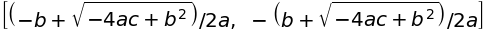

In [ ]:
a, b, c = symbols('a b c')
solve( a*x**2 + b*x + c,x)    

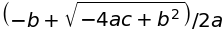

In [ ]:
sol = solve( a*x**2 + b*x + c, x)[0]
sol

In [ ]:
sol.subs({a:1, b:2, c:3})

In [ ]:
sol.subs({a:1, b:5, c:-3})

Want to complete the square so that: $x^2-4x+7=(x-h)^2+k$ for some constants $h$ and $k$.

We solve $(x-h)^2+k-(x^2-4x+7)=0$

In [ ]:
h, k = symbols('h k')
solve( (x-h)**2 + k - (x**2-4*x+7), [h,k] )    

verify it


In [ ]:
((x-2)**2+3).expand()

In [ ]:
solve([x+y-6,x-y-2])

systems of equations

$$ x^2+y=0$$
$$ 3y-x=0$$

In [ ]:
print(solve ([x**2+y, 3*y-x]))
print(solve ([x+y-6, x-y-2]))
print(solve(x-2>3))

[{x: -1/3, y: -1/9}, {x: 0, y: 0}]
{x: 4, y: 2}
(5 < x) & (x < oo)


In [ ]:
help (solve)

Help on function solve in module sympy.solvers.solvers:

solve(f, *symbols, **flags)
    Algebraically solves equations and systems of equations.
    
    Explanation
    
    Currently supported:
        - polynomial
        - transcendental
        - piecewise combinations of the above
        - systems of linear and polynomial equations
        - systems containing relational expressions
    
    Examples
    
    The output varies according to the input and can be seen by example:
    
        >>> from sympy import solve, Poly, Eq, Function, exp
        >>> from sympy.abc import x, y, z, a, b
        >>> f = Function('f')
    
    Boolean or univariate Relational:
    
        >>> solve(x < 3)
        (-oo < x) & (x < 3)
    
    
    To always get a list of solution mappings, use flag dict=True:
    
        >>> solve(x - 3, dict=True)
        [{x: 3}]
        >>> sol = solve([x - 3, y - 1], dict=True)
        >>> sol
        [{x: 3, y: 1}]
        >>> sol[0][x]
        3
        

## `Sympy` to `Python` and `Numpy`

See [Sympy Numeric Computation](http://docs.sympy.org/latest/modules/numeric-computation.html)


In [ ]:
x,y,z  = symbols("x y z")
sol = solve( a*x**2 + b*x + c, x)[0]
s1 = N(sol.subs({a:1, b:5, c:-3}))
ss1 = sqrt(s1)
ns1 = np.sqrt(float(s1))
print (ss1, type(ss1))
print (ns1, type(ns1))

0.735786154496746 <class 'sympy.core.numbers.Float'>
0.7357861544967463 <class 'numpy.float64'>


obtain a one argument function

In [ ]:
expr = (sin(x) + x**2)/2

In [ ]:
exp2=x**2+5*x+6

In [ ]:
f2=lambdify(x,exp2)

In [ ]:
f2(-1)

In [ ]:
f1 = lambdify(x, expr)

In [ ]:
f1

<function _lambdifygenerated>

In [ ]:
f1(10)

In [ ]:
f1(np.array([1,2,3]))

array([0.92073549, 2.45464871, 4.57056   ])

In [ ]:
[f1(i) for i in [1,2,3]]

obtain a vectorized function

In [ ]:
f2 = lambdify(x, expr, "numpy")

In [ ]:
f2

<function _lambdifygenerated>

In [ ]:
f2(10)

In [ ]:
f2(np.array([10,2,3]))

array([49.72798944,  2.45464871,  4.57056   ])

In [ ]:
%timeit [f1(i) for i in range(1000)]

100 loops, best of 5: 3.36 ms per loop


In [ ]:
%timeit f2(np.arange(1000))

10000 loops, best of 5: 61.5 µs per loop


two arguments function

In [ ]:
expr = (sin(x) + cos(y))/2

In [ ]:
f = lambdify([x, y], expr, "numpy")

In [ ]:
f(10,1)

In [ ]:
f([10,10],[1,1])

array([-0.0018594, -0.0018594])

## Calculus

Differentiation

In [ ]:
diff(x**2)

In [ ]:
diff(x**2+x*y, x)

In [ ]:
diff(exp(x))

differentiation knows some rules (for instance the product rule)

In [ ]:
diff(x**2*sin(x))

indefinite integral

In [ ]:
integrate(x**2)

definite integral

In [ ]:
integrate(x/(x**2+2*x+1), (x,0,1))

In [ ]:
integrate(x**2, (x,-1,3))

differential equations, solving $\frac{dy}{dt}=y(t)+t$

In [ ]:
t, C1 = symbols("t C1")
y = symbols("y", cls=Function)
dydt = y(t)+t
eq = dydt-diff(y(t),t)
yt = dsolve(eq, y(t))
yt

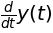

In [ ]:
diff(y(t))

In [ ]:
yt.rhs

check the solution

In [ ]:
simplify(dydt.subs({y(t): yt.rhs})-diff(yt.rhs,t))

set initial conditions $Y(0)=2$ and obtain $C1$

In [ ]:
eq1 = Eq(yt.rhs.subs({ t:0}).evalf(), 2.)
sol = solve([eq1], [C1])
C1_val = sol[C1]
C1_val

In [ ]:
fY = lambdify(t, yt.rhs.subs({C1: C1_val}), "numpy")
fY(0)

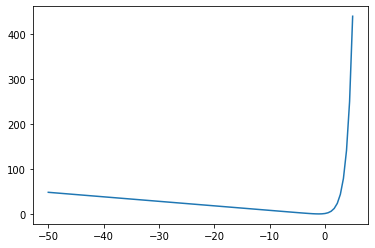

In [ ]:
t_vals = np.linspace(-50,5,100)
plt.plot(t_vals, fY(t_vals))

# Some problems

### RLC circuit

Model:

$\begin{array}{l}
\frac{{di}}{{dt}} =  - \frac{R}{L}i(t) - \frac{1}{L}v(t) + \frac{1}{L}vi\\
\frac{{dv}}{{dt}} = \frac{1}{C}i(t)
\end{array}$

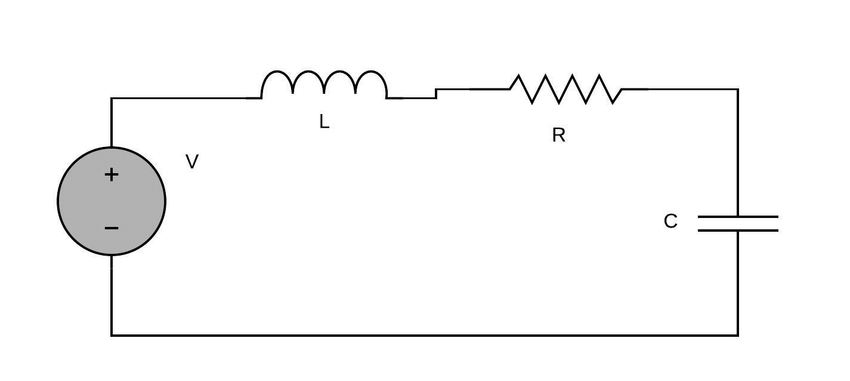

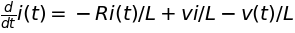

In [ ]:
t, vi, L, R, C = symbols("t vi L R C")
C1,C2 = symbols("C1 C2")
v = Function("v")(t)
i = Function("i")(t)

didt=i.diff(t)
dvdt=v.diff(t)
expr1 = Eq(didt, (1/L)*vi-(R/L)*i-(1/L)*v)
expr1

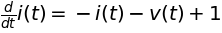

In [ ]:
expr1=expr1.subs(L, 1).subs(R,1).subs(C,1).subs(vi,1)
expr1

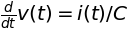

In [ ]:
expr2 = Eq(dvdt, (1/C)*i)
expr2

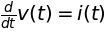

In [ ]:
expr2=expr2.subs(L,1).subs(R,1).subs(C,1).subs(vi,1)
expr2

In [ ]:
#eq=v(t).
#s=dsolve(diff(v(t),t)==v(t))
s=dsolve([expr1,expr2])
s

In [ ]:
eq1 = Eq(s[0].rhs.subs({t:0}).evalf(), 0.1)
eq2 = Eq(s[1].rhs.subs({t:0}).evalf(), 0.1)
sol = solve([eq1,eq2], [C1,C2])
print(sol)

{C1: -0.900000000000000, C2: 0.404145188432738}


In [ ]:
eq1

In [ ]:
s[0].rhs

In [ ]:
e1 = lambdify(t,s[0].rhs.subs(sol),'numpy')
e2 = lambdify(t,s[1].rhs.subs(sol),'numpy')

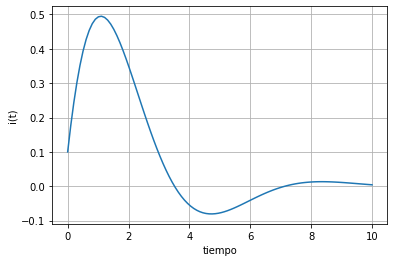

In [ ]:
t_vals = np.linspace(0,10,100)
plt.plot(t_vals, e1(t_vals))
plt.xlabel('tiempo')
plt.ylabel('i(t)')
plt.grid(True)

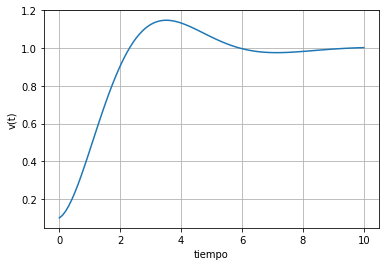

In [ ]:
plt.plot(t_vals, e2(t_vals))
plt.xlabel('tiempo')
plt.ylabel('v(t)')
plt.grid(True)

### Tangent line to a function

The tangent line to the function $f(x)$ at $x = x_0$ is the line that passes
through the point $(x_0, f(x_0))$ and has the same slope as the function
at that point. The tangent line to the function $f(x)$ at the point
$x = x0$ is described by the equation
$$T_1(x) = f(x_0) + f'(x_0)(x − x_0)$$

What is the equation of the tangent line to $f(x) = \frac{1}{2}x^2$
at $x_0 = 1$?

In [ ]:
from sympy import *
x, f = symbols("x f")
f = 1./2*x**2
print ('f(x)', f)
df = diff(f,x)
print ("f'(x)", df)
x
T_1 = f.subs({x:1}) + df.subs({x:1})*(x - 1)
print ("T1(x)", T_1)

f(x) 0.5*x**2
f'(x) 1.0*x
T1(x) 1.0*x - 0.5


check value and slope of function and tangent line are equal

In [ ]:
T_1.subs({x:1})- f.subs({x:1})

In [ ]:
diff(T_1,x).subs({x:1}) - diff(f,x).subs({x:1})

obtain python functions from expressions and plot

In [ ]:
fp = lambdify(x,f, "numpy")
tp = lambdify(x,T_1, "numpy")

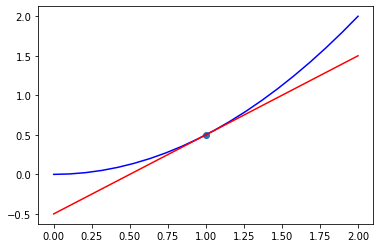

In [ ]:
xr = np.linspace(0,2,20)
plt.plot(xr, fp(xr), color="blue")
plt.plot(xr, tp(xr), color="red")
plt.scatter(1, fp(1))

### Damped harmonic oscilator

In [ ]:
from sympy import *
t, w = symbols("t \\omega_0", positive=True)
d = symbols("\\xi", real=True)
x = Function("x", real=True)
eq = x(t).diff(t,t) + 2*d*w*x(t).diff(t) + w**2*x(t)

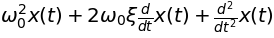

In [ ]:
eq

Resolvemos con condiciones iniciales $\omega=0$ y $\xi=1/10$

In [ ]:
eq = eq.subs(w, 1).subs(d, Rational(1,10))
# Solve differential equation
sol = dsolve(eq,x(t))
sol

In [ ]:
# Starting conditions x(0) = 1, and dx(0)/dt = 0
C1, C2 = symbols("C1, C2")
const = solve([sol.rhs.subs(t,0) - 1, sol.rhs.diff(t).subs(t, 0)], [C1,C2])
print ("const =", const)
# Replace C1 and C2 in solution
initvalue_solution = sol.rhs.subs(C1, const[C1]).subs(C2, const[C2])
print ("Applying initial conditions \nx(t) = ")
initvalue_solution

const = {C1: sqrt(11)/33, C2: 1}
Applying initial conditions 
x(t) = 


Text(0.5, 0, 't')

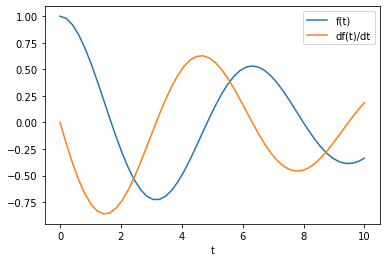

In [ ]:
T = np.linspace(0, 10)
F = np.vectorize(lambda val: initvalue_solution.subs(t, val).evalf())
dFdT = np.vectorize(lambda val: initvalue_solution.diff(t).subs(t, val).evalf())
plt.plot(T, F(T))
plt.plot(T, dFdT(T))
plt.legend(("f(t)", "df(t)/dt"))
plt.xlabel("t")


Text(0.5, 0, 't')

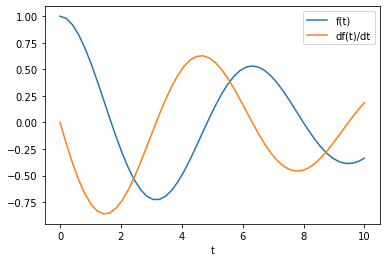

In [ ]:
T = np.linspace(0, 10)
F = lambdify(t, initvalue_solution, "numpy")
dFdT = lambdify(t, initvalue_solution.diff(), "numpy")
plt.plot(T, F(T))
plt.plot(T, dFdT(T))
plt.legend(("f(t)", "df(t)/dt"))
plt.xlabel("t")

# The Lotka-Volterra predator-prey model

https://mhasoba.github.io/TheMulQuaBio/notebooks/Appendix-Maths.html

https://mhasoba.github.io/TheMulQuaBio/notebooks/06-Python_II.html#

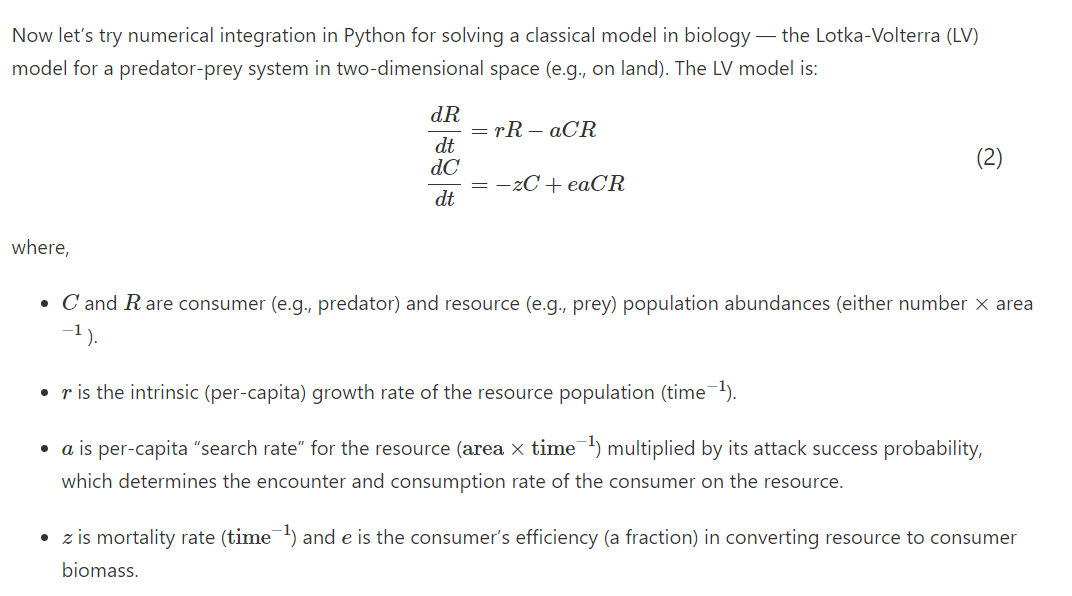

In [ ]:
def dCR_dt(pops, t=0):

    R = pops[0]
    C = pops[1]
    dRdt = r * R - a * R * C 
    dCdt = -z * C + e * a * R * C
    
    return np.array([dRdt, dCdt])

In [ ]:
type(dCR_dt)

function

In [ ]:
r = 1.
a = 0.1 
z = 1.5
e = 0.75

In [ ]:
t = np.linspace(0, 15, 1000)

In [ ]:
R0 = 10
C0 = 5 
RC0 = np.array([R0, C0])

In [ ]:
pops, infodict = integrate.odeint(dCR_dt, RC0, t, full_output=True)

In [ ]:
pops

array([[10.        ,  5.        ],
       [10.07578091,  4.94421976],
       [10.1529783 ,  4.88948321],
       ...,
       [ 9.99869712, 17.56204194],
       [ 9.8872779 , 17.3642589 ],
       [ 9.78000354, 17.16658946]])

In [ ]:
type(infodict)

dict

In [ ]:
infodict.keys()

dict_keys(['hu', 'tcur', 'tolsf', 'tsw', 'nst', 'nfe', 'nje', 'nqu', 'imxer', 'lenrw', 'leniw', 'mused', 'message'])

In [ ]:
infodict['message']

'Integration successful.'

In [ ]:
import matplotlib.pylab as p

In [ ]:
f1 = p.figure()

<Figure size 432x288 with 0 Axes>

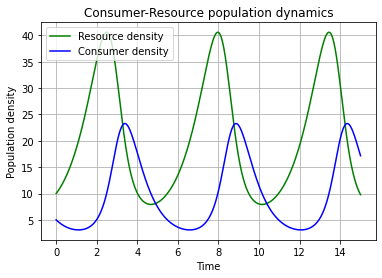

In [ ]:
p.plot(t, pops[:,0], 'g-', label='Resource density') # Plot
p.plot(t, pops[:,1]  , 'b-', label='Consumer density')
p.grid()
p.legend(loc='best')
p.xlabel('Time')
p.ylabel('Population density')
p.title('Consumer-Resource population dynamics')
p.show()# To display the figure

In [ ]:
r_m, a, e, z, K, N, C, t = var("r_m, a, e, z, K, N, C, t",real = True)

In [ ]:
dN_dt = r_m * N *(1-N/K) - a * N * C
dC_dt = e * a * N * C - z * C

dC_dt, dN_dt

In [ ]:
N_eqlb = Eq(dN_dt, 0)
C_eqlb = Eq(dC_dt, 0)
N_eqlb, C_eqlb

In [ ]:
N_eqlb_sol = solve(N_eqlb, C)
C_eqlb_sol = solve(C_eqlb, N)

N_eqlb_sol, C_eqlb_sol

In [ ]:
from scipy import integrate

t_vec = sc.arange(0, 100., 0.01)

# parameters
r_m = 1.
a = 1
e = 0.5
z = .5
K =10

# initial condition: this is an array now!
N0C0 = sc.array([1., 1.])

# the function still receives only `x`, but it will be an array, not a number
def LV(NC, t, r_m, K, a, e, z):
    # Unlike the esponental and logistic growth model, we now need to convert 
    # the output to a numpy array as it has two populations.
    return sc.array([ r_m * NC[0]*(1-NC[0]/K) - a * NC[0] * NC[1],
                   e * a * NC[0] * NC[1] - z * NC[1] ])

NC_vec = integrate.odeint(LV, N0C0, t_vec, (r_m, K, a, e, z))

NameError: ignored